In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
    GlobalAveragePooling2D,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define data directory
data_dir = "data"

In [3]:
# Set up image data generators with validation split and data augmentation
train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=20,      # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Randomly zoom in/out
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill in new pixels after transformations
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(80, 80),  # Adjusted to match your image size
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)

validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(80, 80),  # Adjusted to match your image size
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


In [4]:
# Define the CNN model with increased parameters
cnn_model = Sequential([
    # First Convolutional Block
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 3)),  # Increased filters
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    Conv2D(128, kernel_size=(3, 3), activation='relu'),  # Increased filters
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Block
    Conv2D(256, kernel_size=(3, 3), activation='relu'),  # Increased filters
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fourth Convolutional Block
    Conv2D(512, kernel_size=(3, 3), activation='relu'),  # Increased filters
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening the output from the convolutional layers
    Flatten(),

    # Fully Connected Layers
    Dense(1024, activation='relu'),  # Large fully connected layer
    Dropout(0.5),
    Dense(1024, activation='relu'),  # Another large fully connected layer
    Dropout(0.5),

    # Output Layer for Classification
    Dense(2, activation='softmax')  # Output layer for two classes
])

# Compile the model with an appropriate optimizer and loss function
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

In [5]:
# Display the model summary to understand its architecture
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 78, 78, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 37, 37, 128)      512       
 hNormalization)                                                 
                                                        

In [6]:
# Train the model with more epochs for better learning (adjust as necessary)
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=200)

Epoch 1/200
2123/2123 [==============================] - 135s 63ms/step - loss: 0.3842 - categorical_accuracy: 0.8884 - precision: 0.8884 - recall: 0.8884 - val_loss: 0.4983 - val_categorical_accuracy: 0.7055 - val_precision: 0.7055 - val_recall: 0.7055
Epoch 2/200
2123/2123 [==============================] - 100s 47ms/step - loss: 0.1384 - categorical_accuracy: 0.9546 - precision: 0.9546 - recall: 0.9546 - val_loss: 0.5149 - val_categorical_accuracy: 0.7246 - val_precision: 0.7246 - val_recall: 0.7246
Epoch 3/200
2123/2123 [==============================] - 105s 50ms/step - loss: 0.1174 - categorical_accuracy: 0.9612 - precision: 0.9612 - recall: 0.9612 - val_loss: 0.2107 - val_categorical_accuracy: 0.9206 - val_precision: 0.9206 - val_recall: 0.9206
Epoch 4/200
2123/2123 [==============================] - 105s 50ms/step - loss: 0.1112 - categorical_accuracy: 0.9629 - precision: 0.9629 - recall: 0.9629 - val_loss: 0.3213 - val_categorical_accuracy: 0.8329 - val_precision: 0.8329 - val

In [8]:
# Save the trained model for future use or inference
cnn_model.save("cnn_driver_drowsiness_detection-m2.h5") 

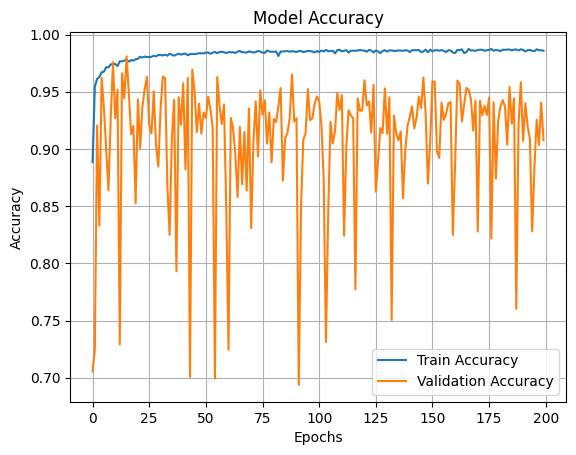

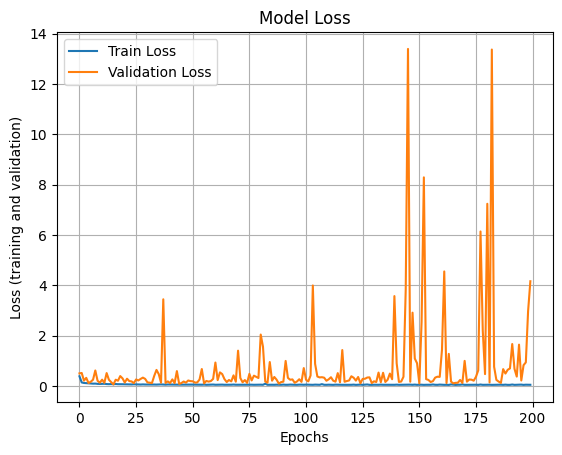

In [7]:
# Plotting accuracy and loss graphs to visualize performance over epochs
plt.figure()
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label='Train Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Epochs")
plt.legend()
plt.grid()
plt.show()